In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [43]:
df = pd.read_csv('housing.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [44]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [45]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [46]:
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity']]
y = df['median_house_value']

In [47]:
ocean_proximity = pd.get_dummies(X['ocean_proximity'], drop_first=True)

In [48]:
X = pd.concat([X, ocean_proximity], axis=1)

In [49]:
X = X.drop(['ocean_proximity'], axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [51]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [53]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
207/207 [==============================] - 2s 5ms/step - loss: 5.2286 - mean_squared_logarithmic_error: 5.2136 - val_loss: 0.2436 - val_mean_squared_logarithmic_error: 0.2435
Epoch 2/10
207/207 [==============================] - 1s 4ms/step - loss: 0.2155 - mean_squared_logarithmic_error: 0.2153 - val_loss: 0.1746 - val_mean_squared_logarithmic_error: 0.1744
Epoch 3/10
207/207 [==============================] - 1s 4ms/step - loss: 0.1701 - mean_squared_logarithmic_error: 0.1700 - val_loss: 0.1432 - val_mean_squared_logarithmic_error: 0.1430
Epoch 4/10
207/207 [==============================] - 1s 4ms/step - loss: 0.1447 - mean_squared_logarithmic_error: 0.1448 - val_loss: 0.1256 - val_mean_squared_logarithmic_error: 0.1254
Epoch 5/10
207/207 [==============================] - 1s 4ms/step - loss: 0.1313 - mean_squared_logarithmic_error: 0.1314 - val_loss: 0.1157 - val_mean_squared_logarithmic_error: 0.1154
Epoch 6/10
207/207 [==============================] - 1s 4ms/step - lo

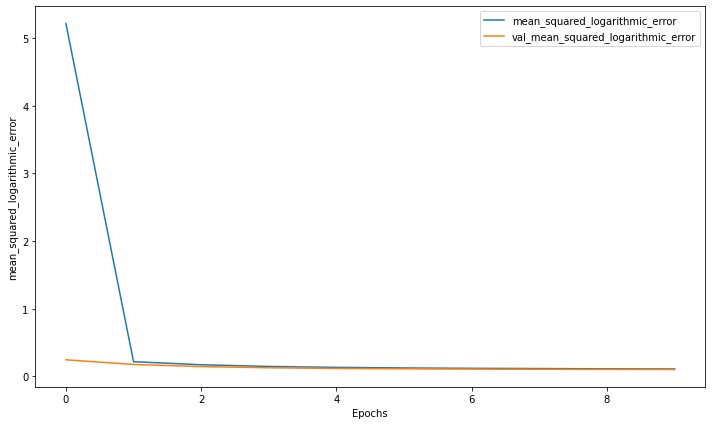

In [58]:
def plot_history(history, key):
  plt.figure(figsize=(12,7))  
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')